## Data Discovering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("data/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
continuous_cols = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
cat_cols = df.drop(columns=continuous_cols.columns)

In [8]:
continuous_cols.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [9]:
def categorical_describe(series):
    """
    Function to describe categorical data in a Series.
    This function returns the count of unique values, the most common values, and their frequencies.
    """
    unique_values = series.unique()
    most_common_values = series.value_counts().head()
    return pd.Series({
        'unique_values_count': len(unique_values),
        'most_common_values': most_common_values.index.tolist(),
        'most_common_values_count': most_common_values.tolist()
    })

In [10]:
cat_data_description = cat_cols.apply(categorical_describe)
cat_data_description

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
unique_values_count,2,4,2,3,2,3,5,4,2
most_common_values,"[1, 0]","[0, 2, 1, 3]","[0, 1]","[1, 0, 2]","[0, 1]","[1, 2, 0]","[0, 1, 2, 3, 4]","[2, 3, 1, 0]","[1, 0]"
most_common_values_count,"[713, 312]","[497, 284, 167, 77]","[872, 153]","[513, 497, 15]","[680, 345]","[482, 469, 74]","[578, 226, 134, 69, 18]","[544, 410, 64, 7]","[526, 499]"


## Feature Analysis

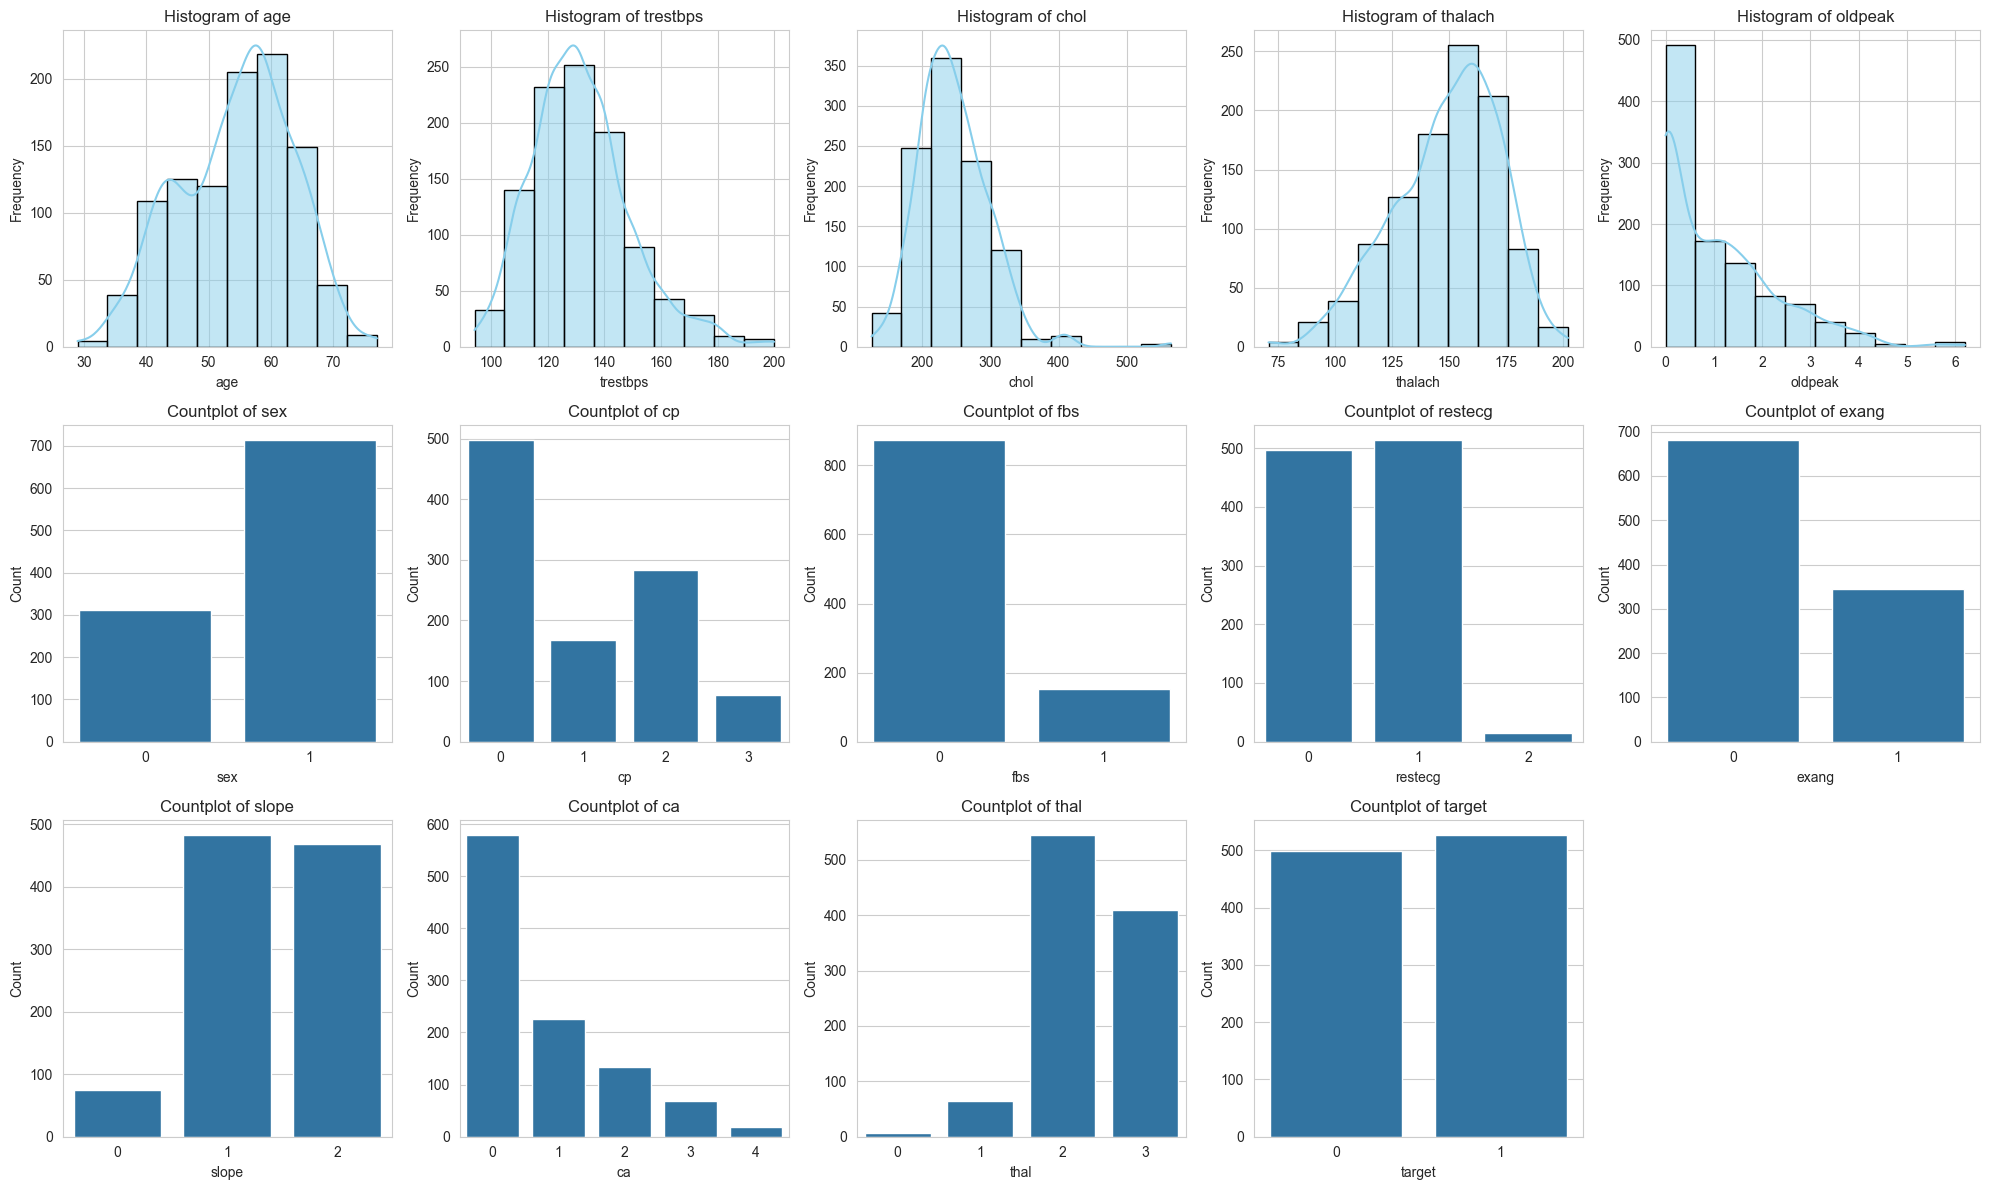

In [11]:
# Create subplots grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))  

# Get column names from continuous_cols DataFrame
continuous_column_names = continuous_cols.columns
cat_column_names = cat_cols.columns

# Iterate over each continuous column
for i, column in enumerate(continuous_column_names):
    # Calculate row and column indices
    row = i // 5
    col = i % 5
    
    # Create histogram for the current continuous column
    sns.histplot(data=continuous_cols[column], bins=10, color='skyblue', kde=True, edgecolor='black', ax=axes[row, col])
    
    # Set labels and title for the current subplot
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')

# Iterate over each categorical column
for i, column in enumerate(cat_column_names):
    # Calculate row and column indices
    row = (i + len(continuous_column_names)) // 5
    col = (i + len(continuous_column_names)) % 5
    
    # Create countplot for the current categorical column
    sns.countplot(data=cat_cols, x=column, ax=axes[row, col])
    
    # Set labels and title for the current subplot
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Countplot of {column}')

# Hide unnecessary subplots
for i in range(len(continuous_column_names) + len(cat_column_names), len(axes.flat)):
    axes.flatten()[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.isna().sum().max()

0

In [14]:
len(df)

1025

In [15]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [16]:
df_corr = df.corr()

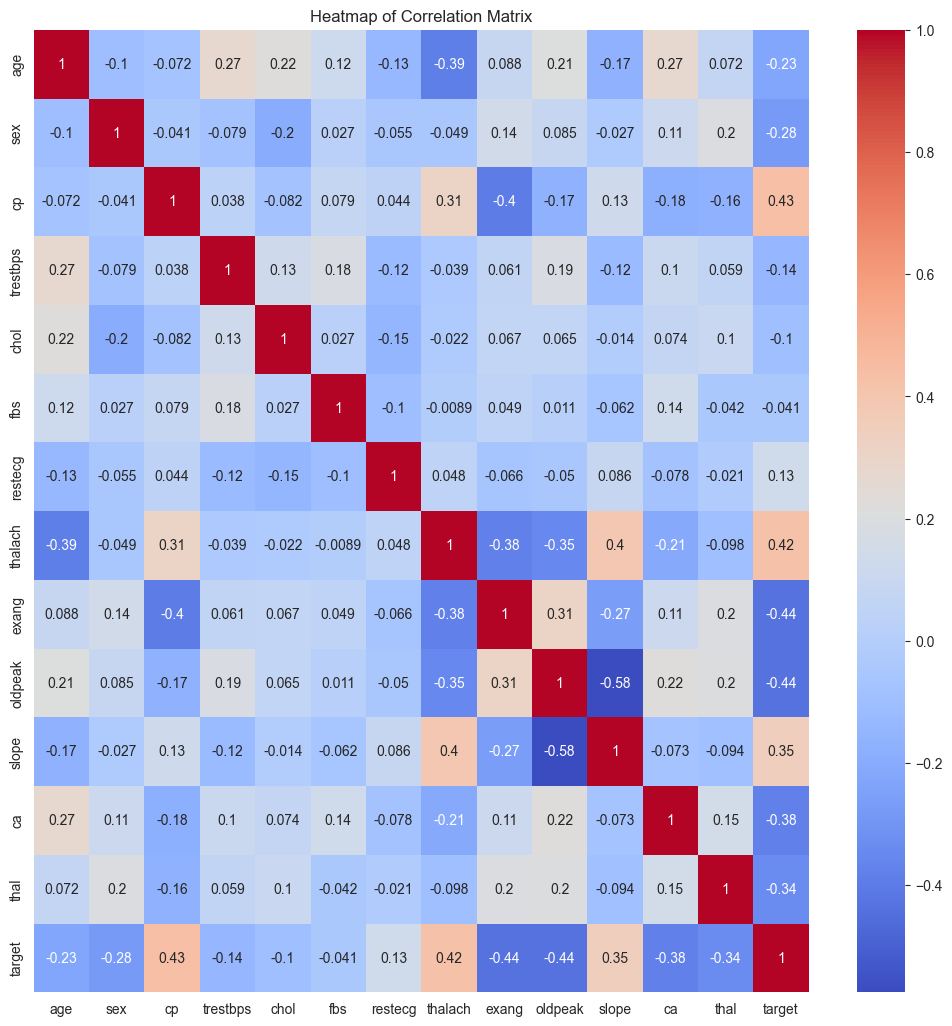

In [17]:
plt.figure(figsize=(12.5,12.5))
sns.heatmap(df_corr, annot=True,cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Data Modeling

In [18]:
X = df.drop('target',axis=1)
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pipelines = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'Naive Bayes': Pipeline([('clf', GaussianNB())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('clf', SVC())]),
    'Random Forest': Pipeline([('clf', RandomForestClassifier())]),
    'Decision Tree': Pipeline([('clf', DecisionTreeClassifier())])
}

In [21]:
param_grids = {
    'Logistic Regression': {'clf__C': [0.1, 1, 10]},
    'KNN': {'clf__n_neighbors': [3, 5, 7]},
    'Naive Bayes': {},
    'SVM': {'clf__C': [0.1, 1, 10], 'clf__gamma': [0.1, 1, 'auto']},
    'Random Forest': {'clf__n_estimators': [50, 100, 200]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10, 20]}
}

In [22]:
grid_searches = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
    grid_searches[model_name] = grid_search

In [23]:
best_estimators = {}
for model_name, grid_search in grid_searches.items():
    print(f"Training {model_name}...")
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

Training Logistic Regression...
Training KNN...
Training Naive Bayes...
Training SVM...
Training Random Forest...
Training Decision Tree...


In [24]:
best_estimators

{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression(C=1))]),
 'KNN': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', KNeighborsClassifier(n_neighbors=3))]),
 'Naive Bayes': Pipeline(steps=[('clf', GaussianNB())]),
 'SVM': Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(C=10, gamma=0.1))]),
 'Random Forest': Pipeline(steps=[('clf', RandomForestClassifier())]),
 'Decision Tree': Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=10))])}

In [25]:
for model_name, estimator in best_estimators.items():
    print(f"Predictions using best estimator of {model_name}:")
    y_pred = estimator.predict(X_test)
    print("*" * 100)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print("................Classification Report................")
    print(classification_report(y_test, y_pred, zero_division=1))

Predictions using best estimator of Logistic Regression:
****************************************************************************************************
Confusion Matrix:
[[73 29]
 [13 90]]
Accuracy Score: 0.7951219512195122
................Classification Report................
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Predictions using best estimator of KNN:
****************************************************************************************************
Confusion Matrix:
[[94  8]
 [ 5 98]]
Accuracy Score: 0.9365853658536586
................Classification Report................
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1